In [1]:
import dm_den_viz
import dm_den
import paths
import cropper
import fitting
import lmfit
import pickle
import staudt_utils
import numpy as np
import pandas as pd
from importlib import reload
from IPython.display import display, Latex
from astropy import units as u, constants as c

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import rcParams

rcParams['axes.labelsize']=15.
rcParams['xtick.labelsize'] = 12.
rcParams['ytick.labelsize'] = 12.
rcParams['figure.dpi'] = 110.

mls = 11. #marker label size
#result_figsize = (4.5,3.5) #figure size for the main result plots (rho & sigma)
result_figsize = (4.5,4.8) #figure size for the main result plots (rho & sigma)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

2.5982299930198507 341.44420734138185
(2.6201671766003285, 317.7814619738047)
2.795926694449661 313.17339201335153
(2.87022026182146, 324.9620511869544)
2.624207829157529 361.0964333860136
(2.5528498811296494, 336.4628903248286)


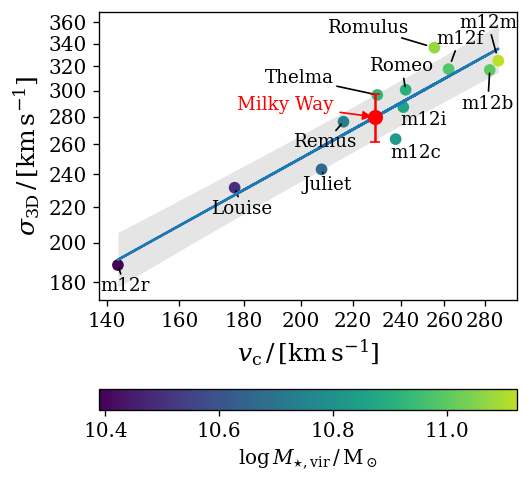

[array([[279.57467057]]), [array([17.84684313])]]

In [44]:
reload(dm_den_viz)
dm_den_viz.plt_vs_vc('disp_dm_disc_cyl', 
                     source_fname = 'dm_stats_dz1.0_20230626.h5',
                     tgt_fname='disp_vs_vphi.png',
                     update_val=True,
                     figsize=result_figsize, labelsize=mls, 
                     adjust_text_kwargs={'force_static': (0.3, 3.),
                                         'force_text': (0.4, 0.4),
                                         #'force_explode': (0.09, 0.03)
                                        },
                     label_overrides={'Romulus': (2.1, 350., True),
                                      'm12m': (2.67, 355., True),
                                      'm12f': (2.56, 340., True)
                                     },
                     dpi_show=120, 
                     xtickspace=0.2, 
                     ytickspace=20.,
                     verbose=False, beta_sig=1.-0.682, 
                     color='masses',
                    )

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

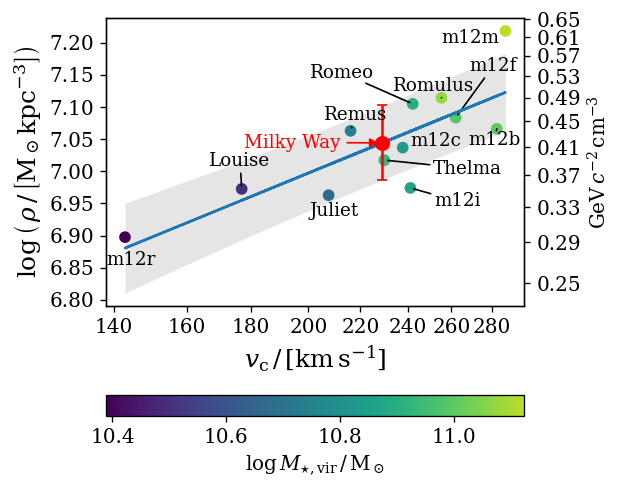

In [35]:
reload(dm_den_viz)
rho_hat = dm_den_viz.plt_vs_vc('den_disc',
                               source_fname = 'dm_stats_dz1.0_20230626.h5',
                               tgt_fname='den_vs_vphi.png',
                               update_val=True,
                               adjust_text_kwargs={'force_static': (0.8, 3.),
                                                   'force_text': (0.6, 0.6),
                                                   'force_explode': (0.1, 0.08),
                                                   'min_arrow_len': 23.
                                                  },
                               label_overrides={'m12m': (2.55, 7.2, False),
                                                'm12c': (2.41, 7.04, False)},
                               figsize=result_figsize, labelsize=mls, 
                               verbose=False,
                               v0=dm_den_viz.vc_eilers,
                               dv0=dm_den_viz.dvc_eilers,
                               dpi_show=120,
                               xtickspace=0.2, beta_sig=1.-0.682, 
                               color='masses')

3.48 kpc arclength bins
0.86% max den diff
1.15% max disp diff


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

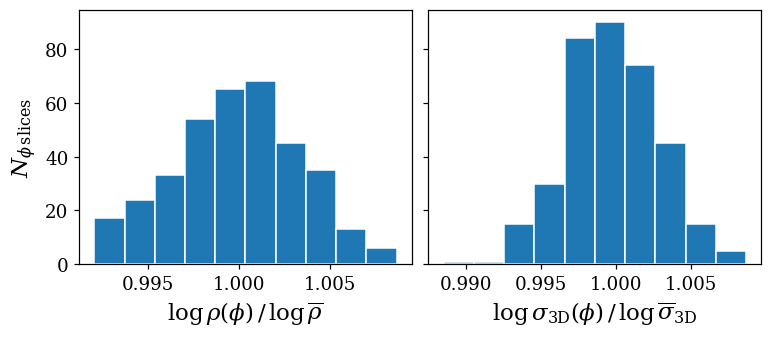

In [5]:
reload(dm_den_viz)
print('{0:0.2f} kpc arclength bins'.format(2.*np.pi*8.3/15.))
dm_den_viz.plt_disc_diffs('dm_stats_dz1.0_20230626.h5',
                          'den_disp_dict_N30_dz1.0_20230707.pkl',
                          only_log=True, figsize=(8,3),
                          tgt_fname='disc_diffs.png',
                          update_val=True)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

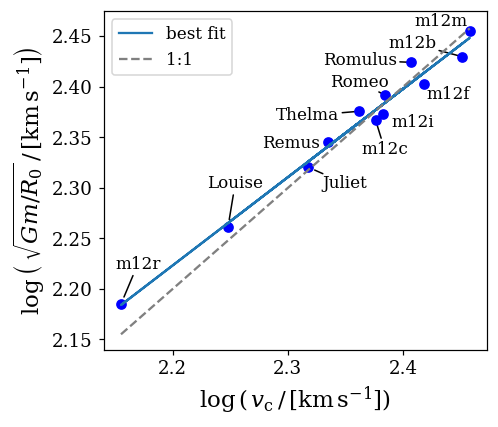

In [77]:
reload(dm_den_viz)
dm_den_viz.plt_gmr_vs_vc(tgt_fname='gmr_vs_vc.png', 
                         figsize=(4.5,4), 
                         adjust_text_kwargs={'force_static': (1.7, 3.),
                                             #'force_text': (0.6, 0.6),
                                             #'force_explode': (5., 5.),
                                             #'min_arrow_len': 23.
                                            },
                         label_overrides={'m12r': (2.15, 2.22, True),
                                          'Louise': (2.23, 2.3, True),
                                          'Remus': (2.278, 2.34, False),
                                          'Juliet': (2.33, 2.3, True),
                                          'm12i': (2.39, 2.36, False),
                                          'm12f': (2.42, 2.388, False),
                                          'm12m': (2.41, 2.46, False)}
                        )

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

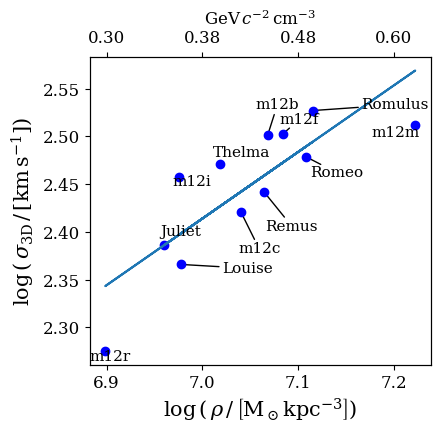

In [99]:
_ = dm_den_viz.plt_slr('dm_stats_20221110.h5',
                   'den_disc', 'disp_dm_disc_cyl',
                   dm_den_viz.den_label, dm_den_viz.disp_label,
                   'log', 'log', dropgals=['m12w','m12z'],
                   figsize=(4.4,4.), arrowprops={'arrowstyle':'-'},
                   adjust_text_kwargs={'force_static':(1.7, 1.7),
                                       'force_explode':(0.05,0.3),
                                       'min_arrow_len':10.},
                   labelsize=mls, show_formula='outside',
                   tgt_fname='disp_vs_den.png',
                   #ax_slr_kwargs={'prediction_x':[[dm_den_viz.rho_sofu],
                   #                               10.**rho_hat[0][0]],
                   #               'dX':[[dm_den_viz.drho_sofu],
                   #                      rho_hat[1][0] \
                   #                      *np.sqrt(10.**(rho_hat[0][0][0]*2.) \
                   #                               * np.log(10.)**2.)]}
                      )
# The extra math on the error bar from my prediction is to get the
# log error bar into a linear error bar that the program will then
# convert back into the original error bar. (The program expects linear
# error bars, even though it might display log error bars in the end.)

#print(_)

In [100]:
df = dm_den.load_data('dm_stats_dz1.0_20230626.h5').drop(['m12w', 'm12z'])
cor_df = df \
    [['disp_dm_disc_cyl',
      'den_disc',
      'v_dot_phihat_disc(T<=1e3)',
      'vcirc']] \
    .rename(columns={'disp_dm_disc_cyl': '$\sigma_\mathrm{3D}$', 
                     'den_disc': '$\rho$',
                     'v_dot_phihat_disc(T<=1e3)': '$v_c$',
                     'vcirc': '$\sqrt{Gm/R_0}$'}) \
    .corr()
for i in range(cor_df.shape[0]):
    for j in range(cor_df.shape[1]):
        if j>i:
            cor_df.iloc[i,j] = ''
caption = 'Correlations between the four variables of interest'
with open(paths.tables+'corr.tex','w') as tf:
    l = cor_df.to_latex(escape=False,
                        float_format='{:0.2f}'.format,
                        caption=caption,
                        label='table:corr')
    tf.write(l)
cor_df

/tmp/ipykernel_11087/3455581519.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  l = cor_df.to_latex(escape=False,


,$\sigma_\mathrm{3D}$,$\rho$,$v_c$,$\sqrt{Gm/R_0}$
$\sigma_\mathrm{3D}$,1.000000,,,
$\rho$,0.787835,1.0,,
$v_c$,0.933800,0.787627,1.0,
$\sqrt{Gm/R_0}$,0.964623,0.833963,0.986555,1.0


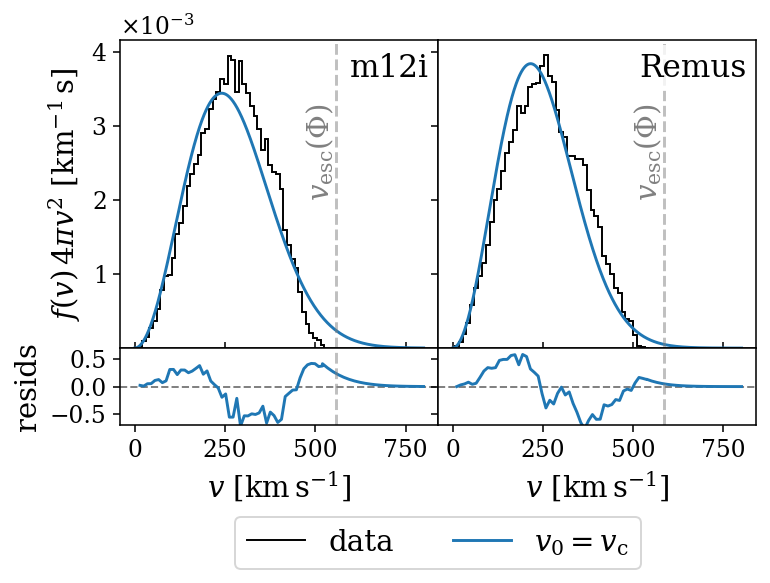

In [101]:
reload(fitting)
fitting.plt_naive(gals=['m12i', 'Remus'],
                  tgt_fname='distribs_from_predicted_sigma.png',
                  show_sigma_vc=False, show_exp=False, show_sigma_meas=False)

100% |########################################################################################################################|


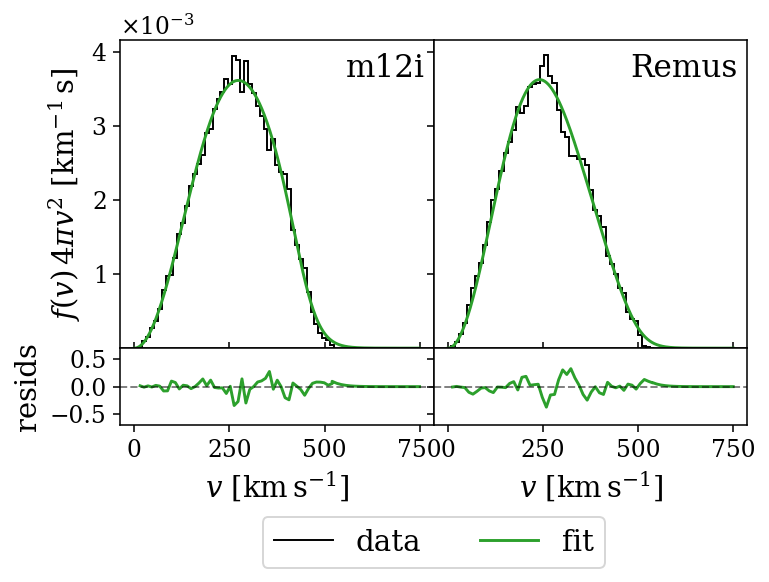

{'m12i': 447.30973574490764, 'Remus': 496.5143391104883}

In [113]:
reload(fitting)
fitting.fit_vdamp(gals=['m12i', 'Remus'],
                  tgt_fname='vdamp_fits.png')

In [120]:
reload(fitting)
result = fitting.plt_universal(gals=['m12i', 'Remus'], update_values=False, 
                               tgt_fname='universal_fits.png', 
                               band_color=plt.cm.viridis(1.), band_alpha=0.9,
                               data_color='k', ymax=0.006)

Using ddfrac = 0.07500
Using dhfrac = 0.13125


ValueError: You should only update values when you're plotting all the discs.

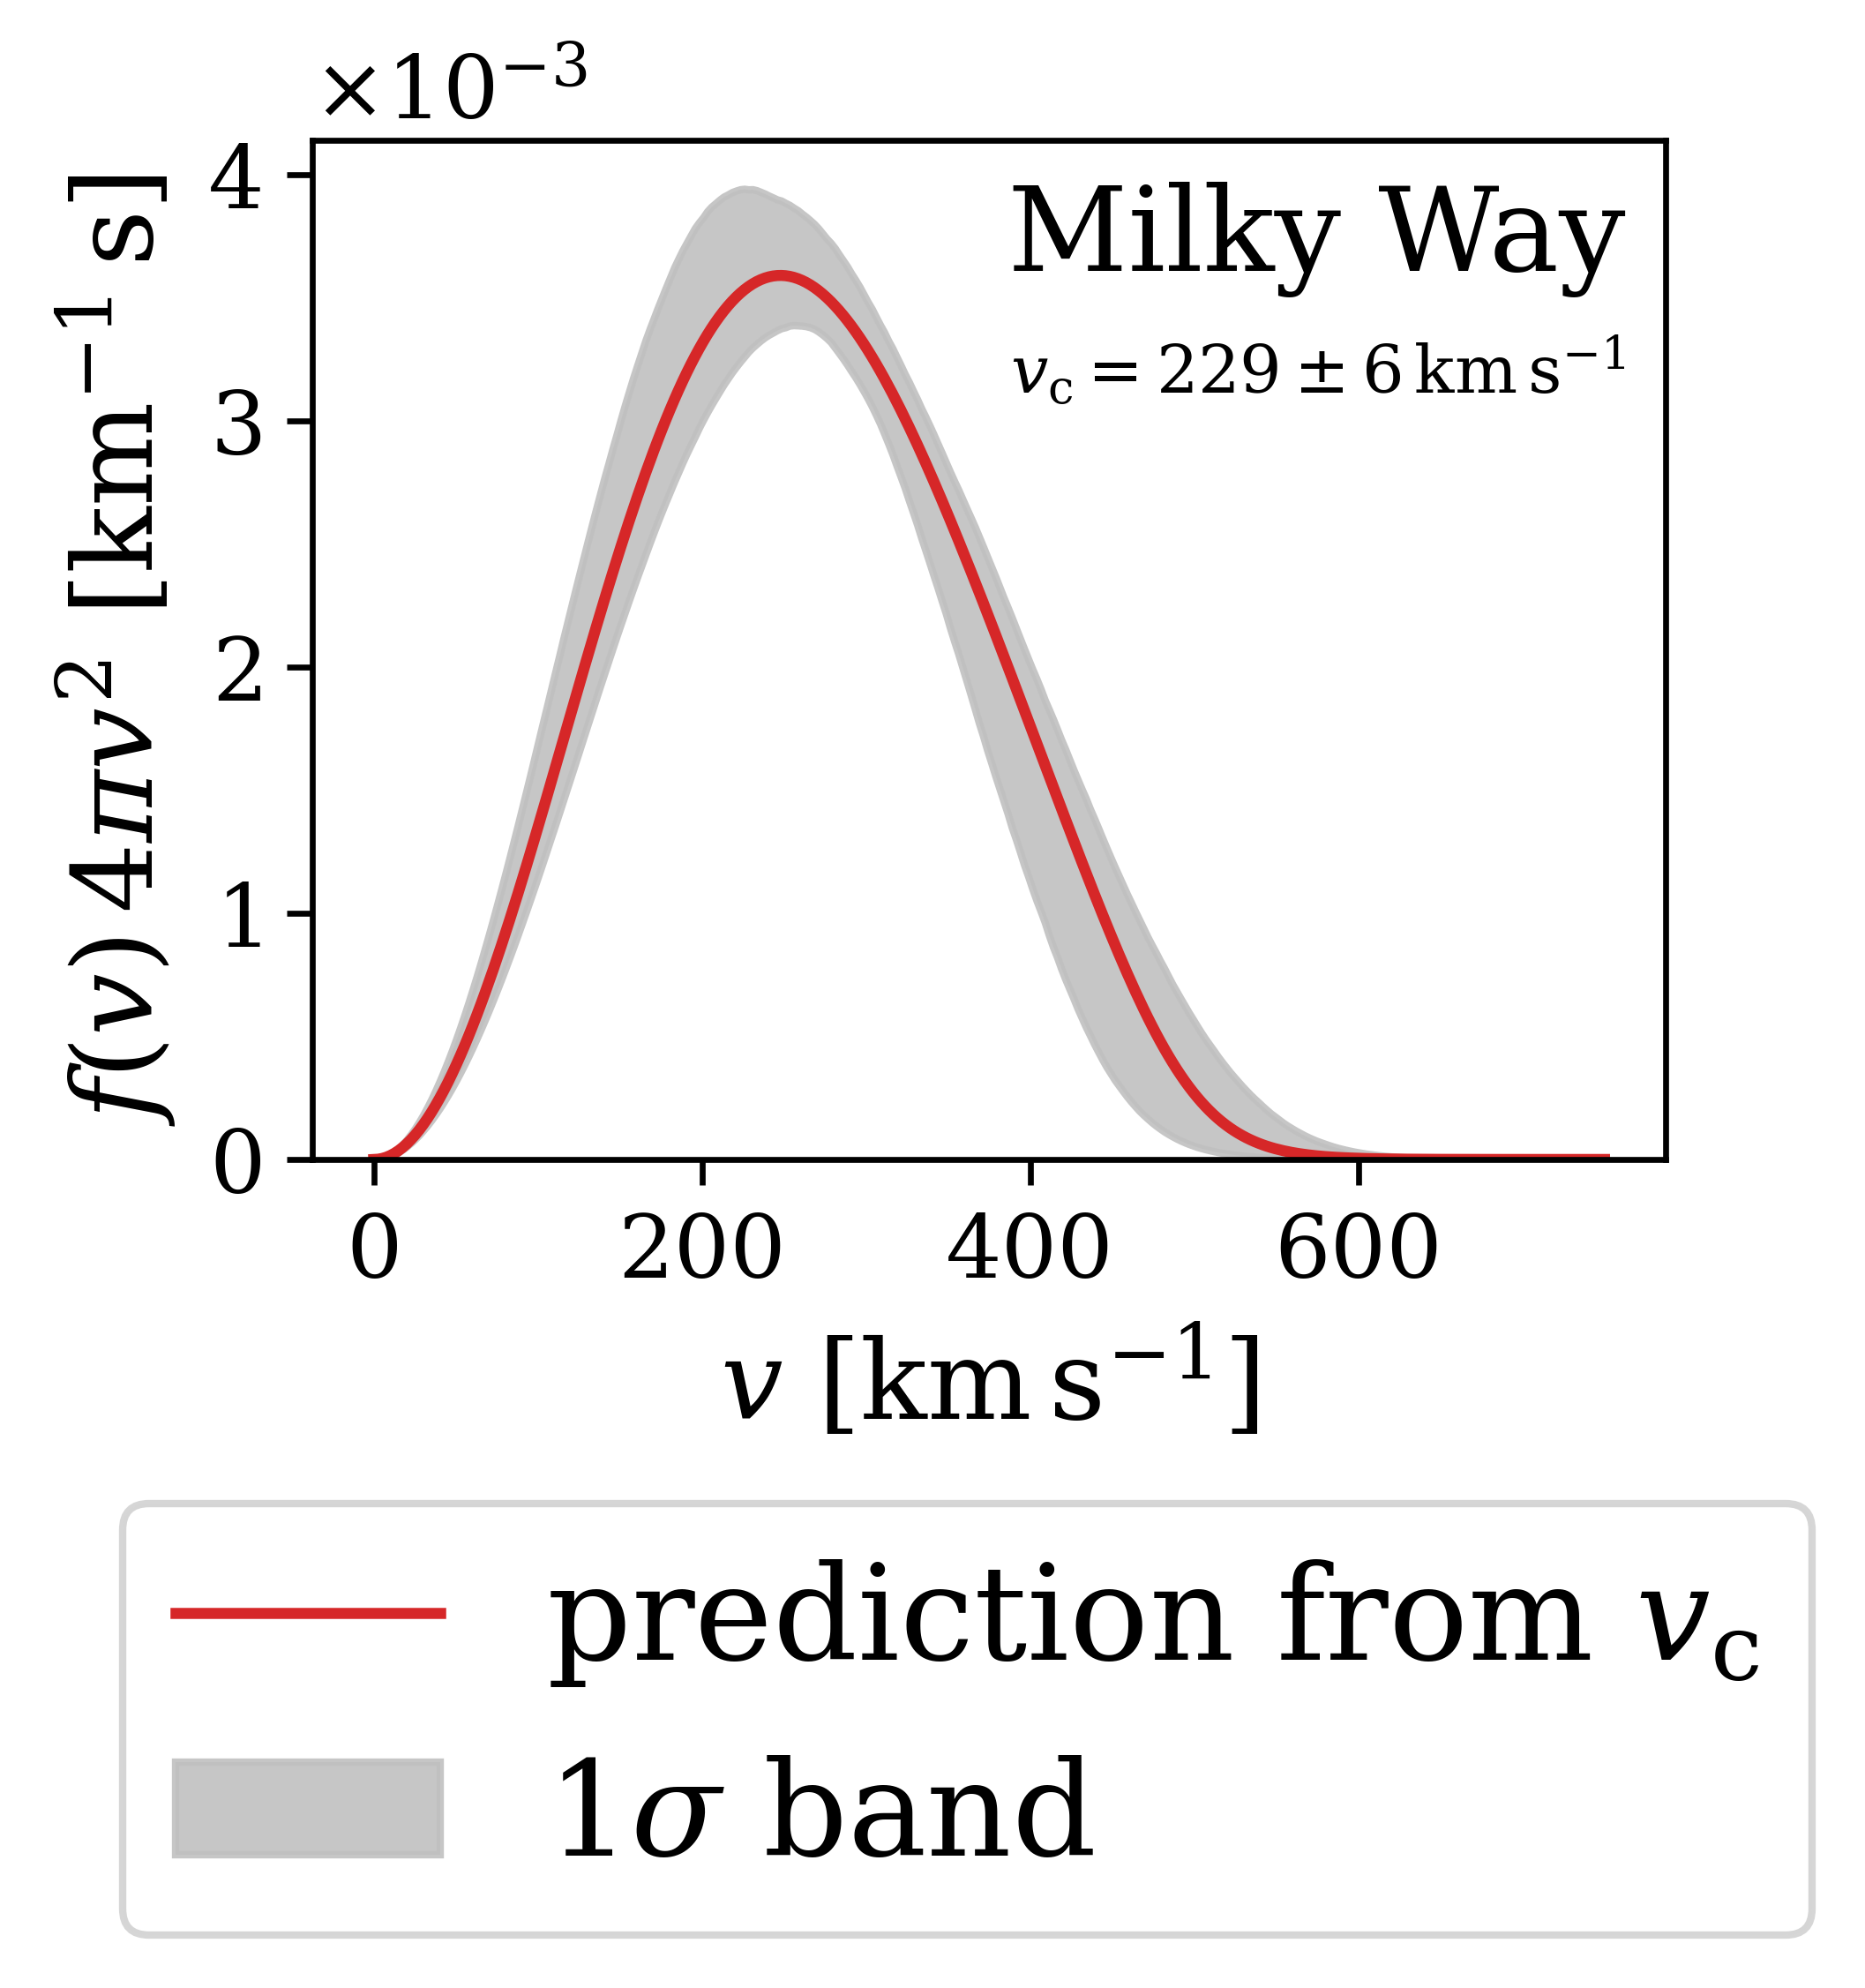

In [26]:
%matplotlib inline
reload(fitting)
reload(dm_den_viz)
dm_den_viz.plt_mw(tgt_fname='distrib_mw.png', dvc=6.)

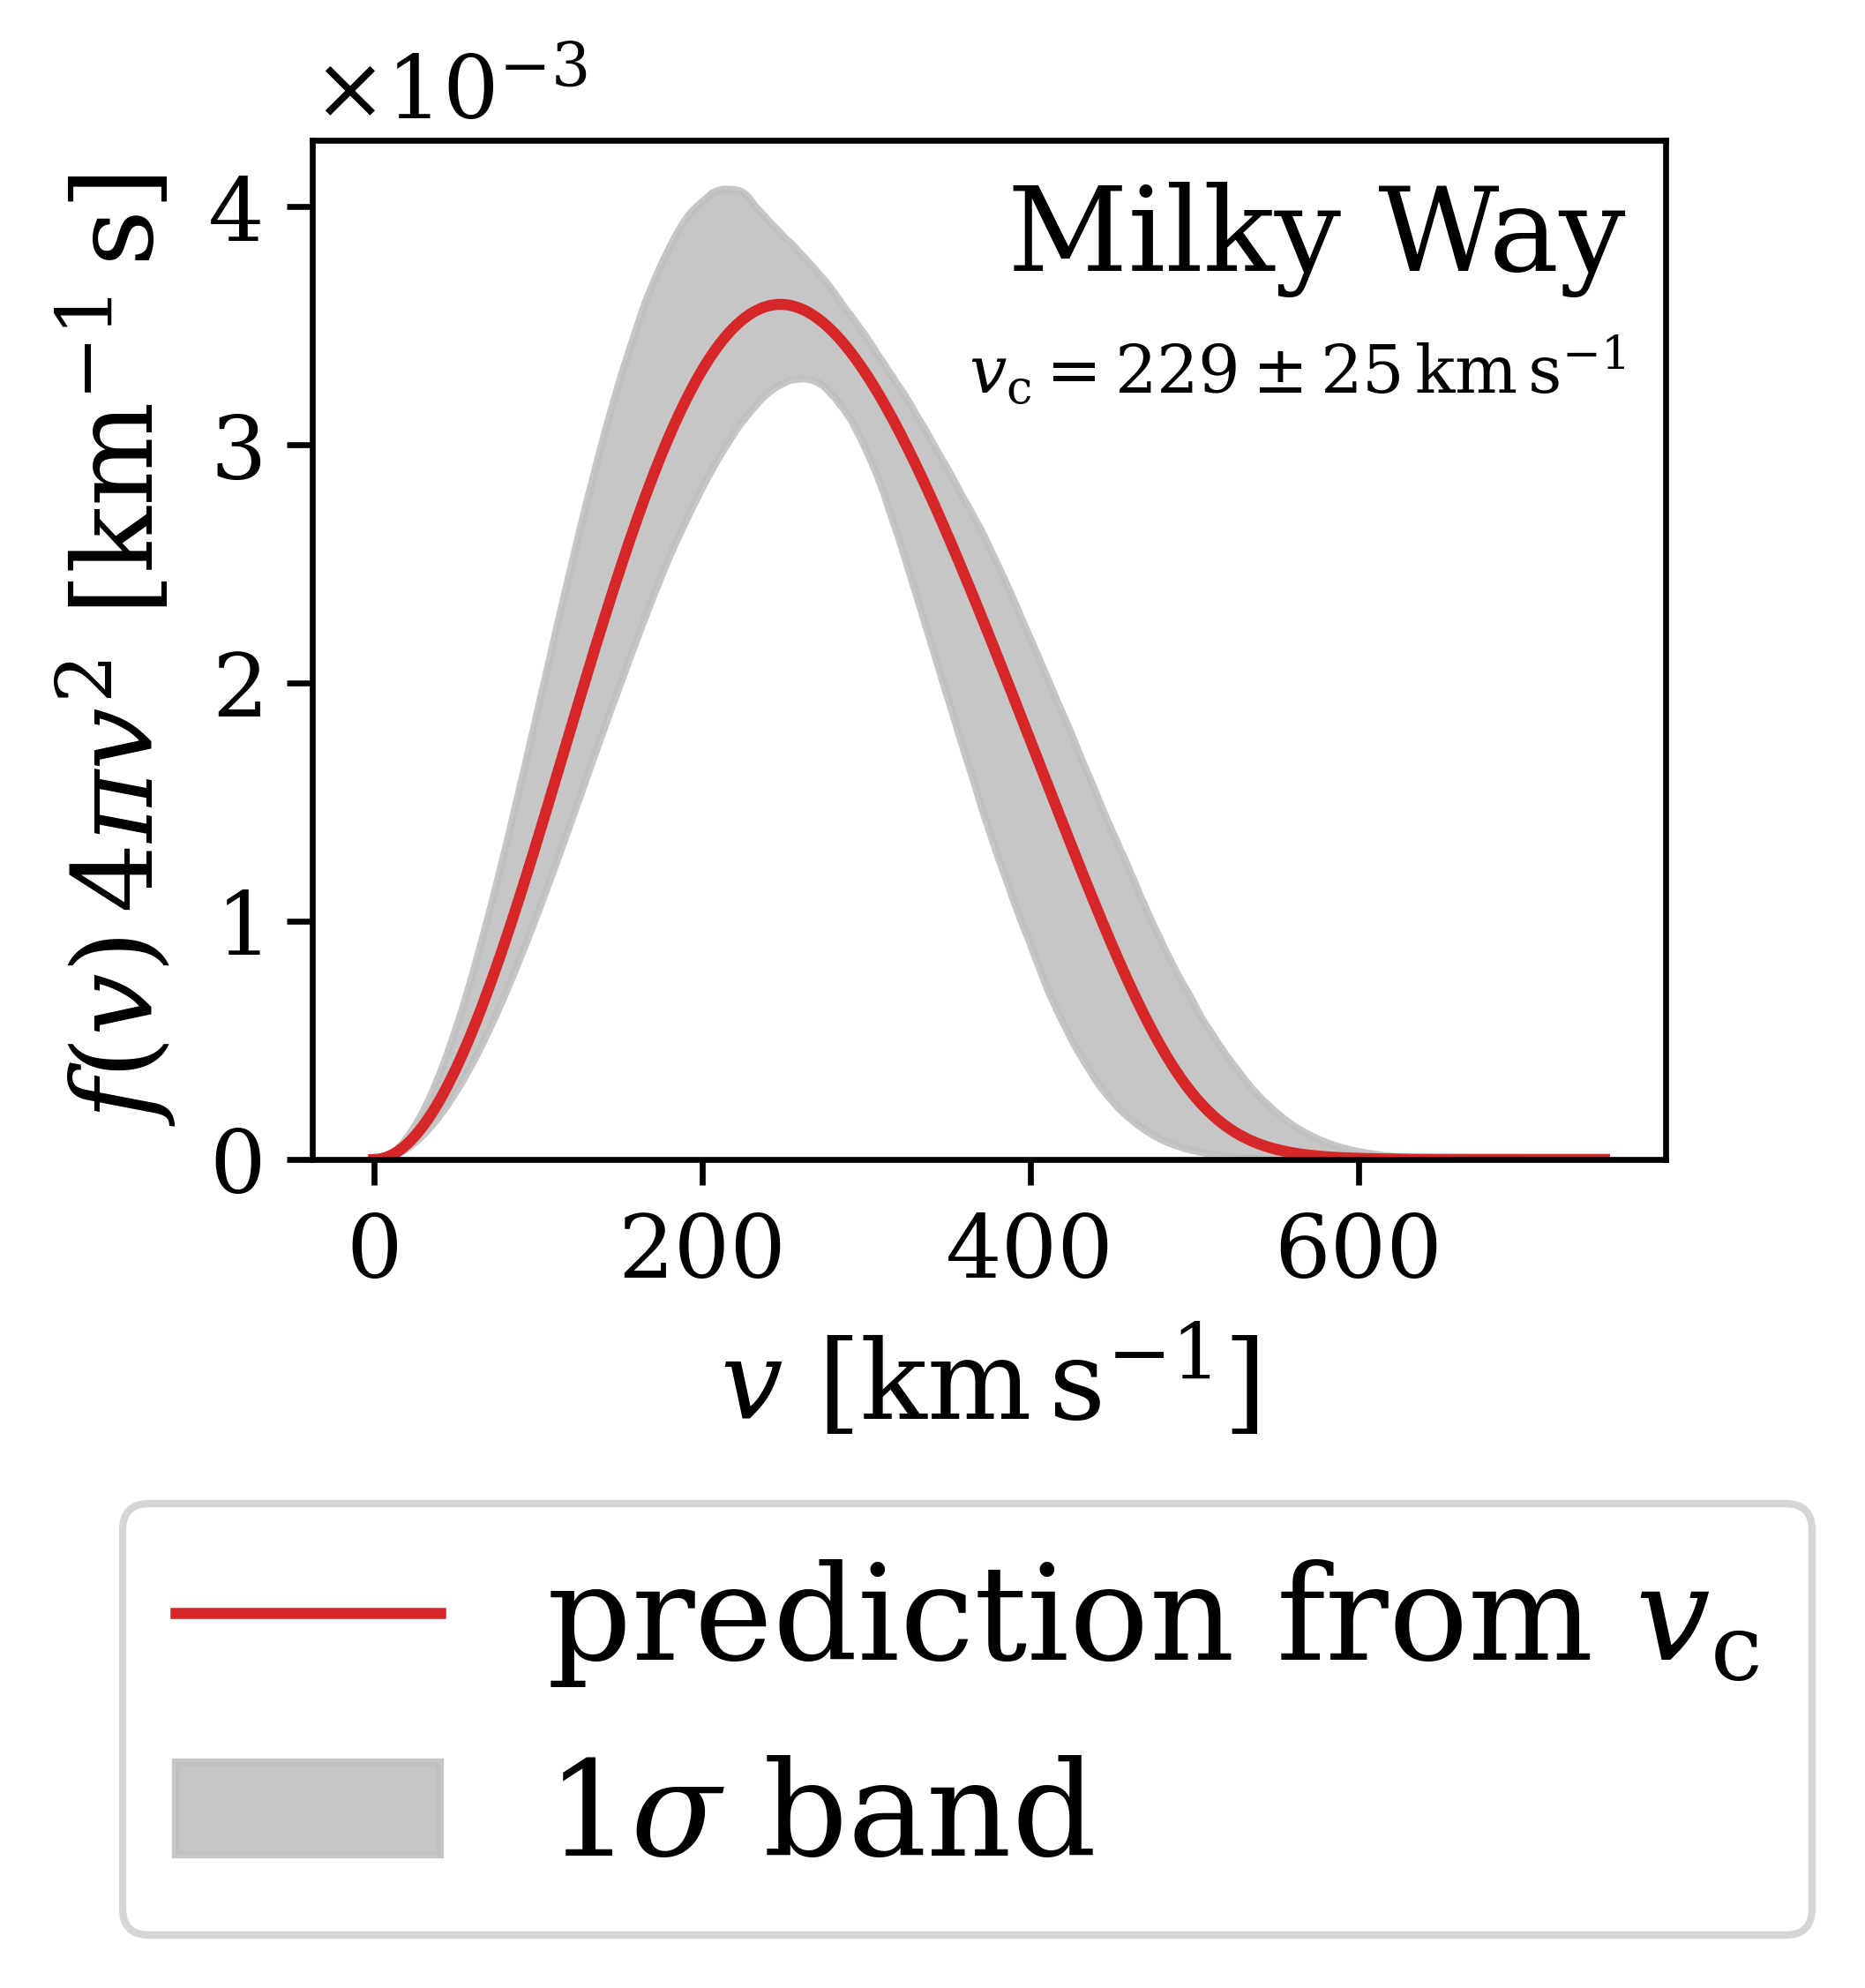

In [24]:
reload(dm_den_viz)
dm_den_viz.plt_mw(dvc=25.)

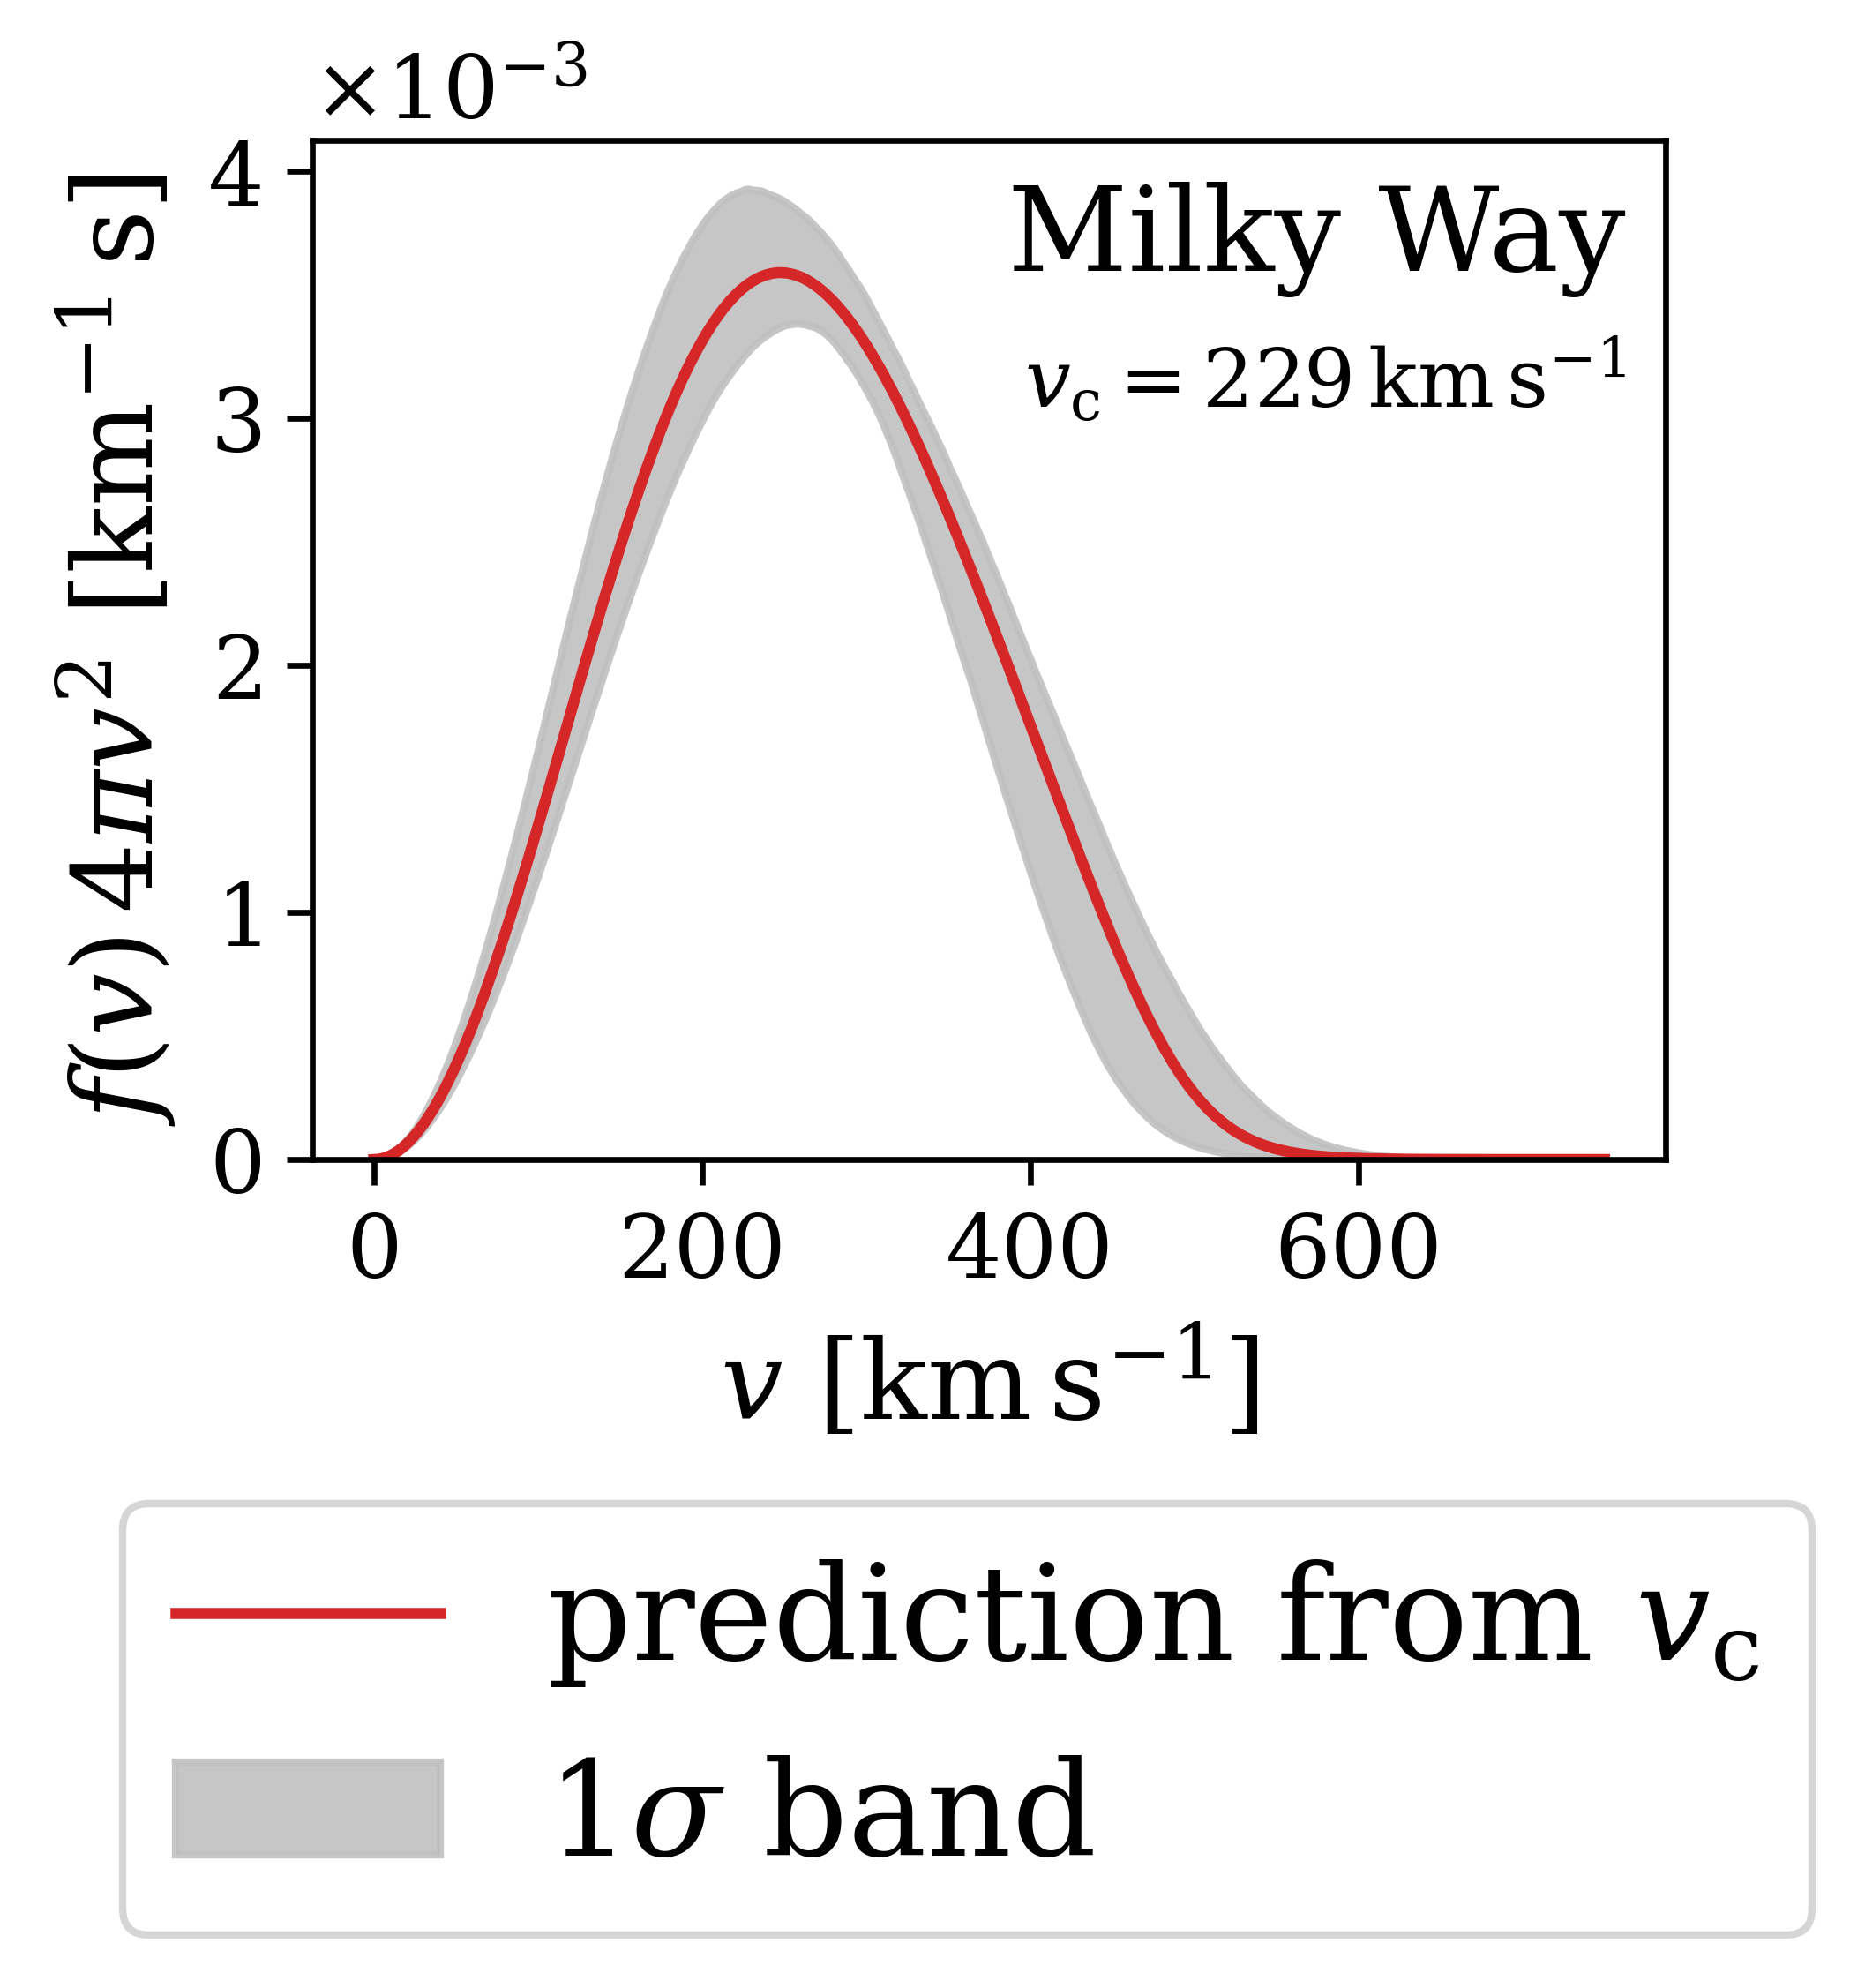

In [25]:
dm_den_viz.plt_mw(dvc=0.)

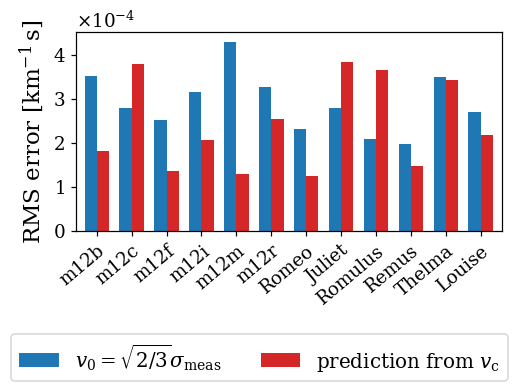

In [35]:
reload(fitting)
fitting.compare_methods(save_fname='rms.png', verbose=False)